<a href="https://colab.research.google.com/github/quangvinht/Phan_tich_du_lieu_hoc_sau/blob/main/example_lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/phantichdulieu/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head(10)

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0
5,1/22/2020,Iran;Asia,0.0,NaN,0.0
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0
9,6/6/2020,Guyana;South America,154.0,80.0,12.0


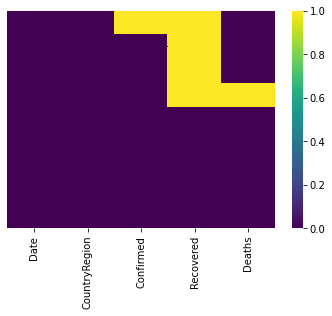

In [13]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [14]:

df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})


print("The original dataframe:\n")
print(df)


def get_mean(scores):
    return sum(scores)/len(scores)


result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


In [15]:

df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])


print("The original dataframe:\n")
print(df)


def get_mean(scores):
    return sum(scores)/len(scores)


result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)


The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


In [16]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )
  

In [17]:
def split_name(x_df):
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

In [18]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


In [19]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [20]:
res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


In [23]:
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)
print(a)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]


In [24]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [25]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

In [26]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df

In [28]:
res=(res.pipe(create_evaluation_group))
print(res)

         Date         CountryRegion  Confirmed  ...   country,  region Evaluation
0   1/22/2020          Ghana;Africa        NaN  ...      Ghana      AF        NaN
1   1/22/2020         Greece;Europe        NaN  ...     Greece      EU        NaN
2   1/22/2020        Iceland;Europe        0.0  ...    Iceland      EU     normal
3   1/22/2020            India;Asia        0.0  ...      India      AS     normal
4   1/22/2020        Indonesia;Asia        0.0  ...  Indonesia      AS     normal
5   1/22/2020             Iran;Asia        0.0  ...       Iran      AS     normal
6   1/22/2020             Iraq;Asia        0.0  ...       Iraq      AS     normal
7   1/22/2020        Ireland;Europe        0.0  ...    Ireland      EU     normal
8    6/6/2020         Guinea;Africa     4117.0  ...     Guinea      AF     medium
9    6/6/2020  Guyana;South America      154.0  ...     Guyana      SA     normal
10   6/6/2020   Haiti;North America     3072.0  ...      Haiti      NA     medium
11   6/6/2020   